# Evaluating Model Perforamance on Real-World Images

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas
import random
from PIL import Image

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.utils as utils

In [2]:
# Define the transform for the data. From the fruit dataset spec images should be 320x258.
transform = transforms.Compose(
    [transforms.Resize((258,320)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Renormalize images
inv_normalize = transforms.Compose(
    [transforms.Normalize(mean=[-1, -1, -1], std=[1/0.5, 1/0.5, 1/0.5]),
     transforms.ToPILImage()
    ]
)

In [3]:
# Load model
# Construct Model
model = models.resnet18(pretrained=False)
# Load model from pretrained models
model = torch.nn.DataParallel(model).cuda().eval()
checkpoint = torch.load('../trained/resnet18_128_5_99p.pt')
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [4]:
# Load fruit dataset
test_imgs = datasets.ImageFolder("../test_img/",transform=transform)
#Create Data Loader
loader = torch.utils.data.DataLoader(test_imgs, shuffle=False, num_workers=2, pin_memory=True)
test_imgs

Dataset ImageFolder
    Number of datapoints: 8
    Root location: ../test_img/
    StandardTransform
Transform: Compose(
               Resize(size=(258, 320), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

## Plot some test images

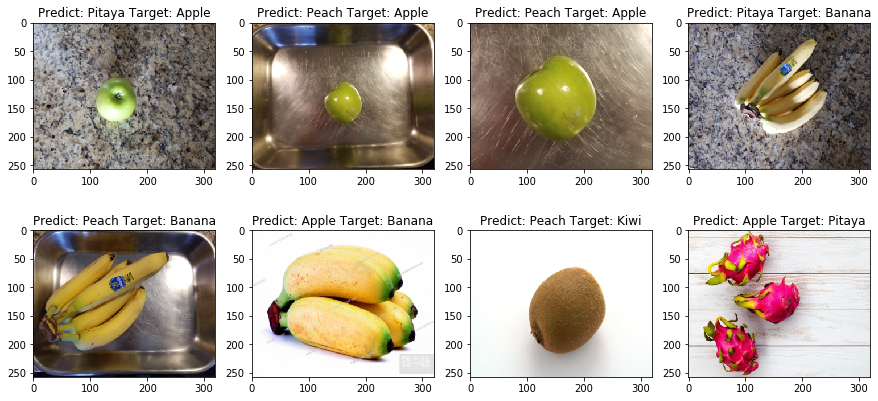

In [6]:
plt.figure(figsize=(15,7))

with torch.no_grad():
    for i, (input, target) in enumerate(loader):
        test_out = model(input)
        test_prob, test_class = test_out.topk(1, 1, True, True)
        out_class = test_imgs.classes[test_class]
        target_class = test_imgs.classes[target]
        plt.subplot(2, 4, i + 1)
        plt.imshow(inv_normalize(input[0]))
        plt.title('Predict: ' + out_class + ' Target: ' + target_class)
        
plt.savefig('test.pdf', bbox_inches='tight')